# import the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
np.random.seed(35)


Hand written digit recognition
MNIST Dataset
Number of Training Images = 60000
Number of Testing Images = 10000

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Display few images

Text(0.5, 1.0, '0')

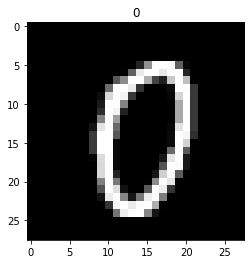

In [3]:
plt.imshow(X_train[1000], cmap='gray')
plt.title(y_train[1000])

Text(0.5, 1.0, '7')

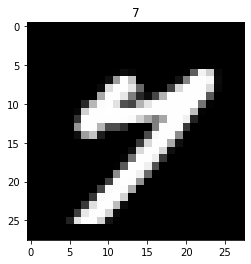

In [4]:
plt.imshow(X_train[1001], cmap='gray')
plt.title(y_train[1001])

Text(0.5, 1.0, '1')

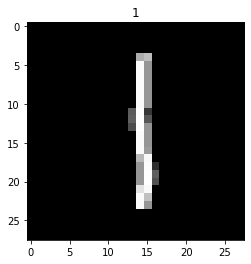

In [5]:
plt.imshow(X_train[1002], cmap='gray')
plt.title(y_train[1002])

Text(0.5, 1.0, '1')

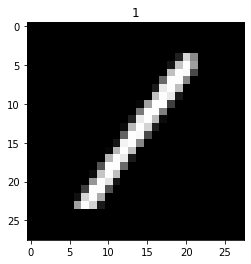

In [ ]:
plt.imshow(X_train[1003], cmap='gray')
plt.title(y_train[1003])

Text(0.5, 1.0, '4')

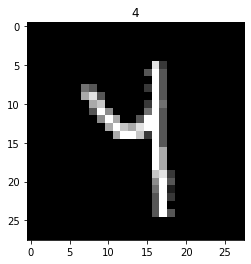

In [ ]:
plt.imshow(X_train[1004], cmap='gray')
plt.title(y_train[1004])

# flatten the 28*28 images to a 784-D vector for each image
# Channel last ordering =>  [rows][cols][samples].  In this case row=column =28, samples=60000

# normalize inputs from 0-255 to 0-1

In [ ]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255 

# one hot encode outputs
# for digit 1 => 0 1 0 0 0 0 0 0 0 0
# for digit 7 => 0 0 0 0 0 0 0 1 0 0

In [ ]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[10], Y_train[10]

(3, array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32))

Build the model

In [ ]:
model = Sequential()

model.add(Dense(512, input_dim=784,activation='relu'))
# An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0.
#model.add(Activation('relu'))
# Dropout helps protect the model from memorizing or "overfitting" the training data
#model.add(Dropout(0.2))

model.add(Dense(256,activation='relu'))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
#model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
size = int(len(X_train) * 0.8)

train_x, val_x = X_train[:size], X_train[size:]
train_y, val_y = Y_train[:size], Y_train[size:]

In [ ]:
hist = model.fit(train_x, train_y, batch_size=128, epochs=20, validation_data=(val_x, val_y))

Epoch 1/20
375/375 [==============================] - 6s 13ms/step - loss: 0.2494 - accuracy: 0.9260 - val_loss: 0.1182 - val_accuracy: 0.9621
Epoch 2/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0914 - accuracy: 0.9727 - val_loss: 0.0994 - val_accuracy: 0.9694
Epoch 3/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0600 - accuracy: 0.9817 - val_loss: 0.0907 - val_accuracy: 0.9723
Epoch 4/20
375/375 [==============================] - 7s 18ms/step - loss: 0.0408 - accuracy: 0.9871 - val_loss: 0.0965 - val_accuracy: 0.9728
Epoch 5/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.0946 - val_accuracy: 0.9728
Epoch 6/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0264 - accuracy: 0.9911 - val_loss: 0.0985 - val_accuracy: 0.9763
Epoch 7/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0230 - accuracy: 0.9930 - val_loss: 0.0918 - val_accuracy: 0.9751

In [ ]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.1129 - accuracy: 0.9788

Test accuracy:  0.9787999987602234


In [ ]:
import numpy as np
from keras.preprocessing import image
#test_image = image.load_img('X_test[1000]')
#test_image = image.img_to_array(test_image)
#test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(X_train)
#predictions = lm.predict(X_test)

In [ ]:
result[1000]

array([9.99999881e-01, 4.76624920e-11, 8.44780814e-08, 1.62731462e-14,
       4.57872004e-11, 1.23817514e-14, 1.82483667e-10, 5.94658329e-13,
       1.88213659e-12, 6.39781250e-09], dtype=float32)

In [ ]:
result[1001]

array([4.28712121e-16, 7.18056430e-12, 8.04765326e-15, 2.13046336e-16,
       1.14379305e-11, 8.67393965e-17, 3.89898109e-20, 1.00000000e+00,
       2.59116941e-17, 2.31200781e-10], dtype=float32)

In [ ]:
result[1002]

array([3.4708014e-11, 9.9999869e-01, 3.5412949e-08, 1.0732131e-10,
       1.2580598e-08, 2.4285959e-10, 8.0361900e-10, 2.3661624e-08,
       1.3586614e-06, 1.5398960e-09], dtype=float32)

In [ ]:
result[1003]

array([8.84377783e-15, 1.00000000e+00, 1.07048120e-10, 2.11628512e-19,
       1.73610050e-11, 5.12084983e-14, 2.04748246e-13, 6.26532246e-14,
       1.06286846e-13, 8.07820390e-13], dtype=float32)

In [ ]:
result[1004]

array([1.1759682e-12, 1.5191272e-07, 7.4748735e-11, 5.4217872e-12,
       9.9999809e-01, 3.6767746e-12, 1.3076779e-12, 1.0165940e-09,
       9.3972241e-10, 1.8201947e-06], dtype=float32)